## 1. Investigating $R_{GV}(𝛿,w)$

Recall the GV-rate for the weight-constrained setting, where $w$ is the relative weight and 𝛿 is the relative distance, for a given code length $n$:

$$ R_{GV}(w, 𝛿) = 2H(w) - H(T^*) = 2H(w) - H\left(1-w-\frac{𝛿}{2}, \ \frac{𝛿}{2}, \ \frac{𝛿}{2}, \ w-\frac{𝛿}{2}\right) = 2 \left(-w \ \text{log} \ w  - (1-w) \text{log} (1-w) \right) + \left(1-w-\frac{𝛿}{2}\right) \ \text{log} \left(1-w-\frac{𝛿}{2}\right) + 𝛿 \ \text{log} \left(\frac{𝛿}{2}\right) + \left(w-\frac{𝛿}{2}\right) \text{log} \left(w-\frac{𝛿}{2}\right)  $$

The Plotkin bound provides an upper bound on the relative distance 𝛿, for a given weight $w$: 𝛿 $ < 2w(1-w)$. Previously, the case of 𝛿 $= w$ was investigated, which is valid for $w < \frac{1}{2}$. To investigate more general linear relationships between 𝛿 and $w$, we can let $𝛿 = mw$. In this case, the rate becomes:

$$ R_{GV} \left( \frac{𝛿}{m}, \ δ\right) = 2H\left(\frac{𝛿}{m}\right) - H(1-\delta\left(\frac{1}{m}+\frac{1}{2}\right), \ \frac{𝛿}{2}, \ \frac{𝛿}{2}, \ \delta\left(\frac{1}{m}-\frac{1}{2}\right)) = 2\left(-\left(\frac{𝛿}{m}\right)\log_{2}\left(\frac{𝛿}{m}\right)-\left(1-\frac{𝛿}{m}\right)\log_{2}\left(1-\frac{𝛿}{m}\right)\right)+\left(1-\frac{𝛿}{m}-\frac{𝛿}{2}\right)\log_{2}\left(1-\frac{𝛿}{m}-\frac{𝛿}{2}\right) \\ +𝛿\log_{2}\left(\frac{𝛿}{2}\right)+\left(\frac{𝛿}{m}-\frac{𝛿}{2}\right)\log_{2}\left(\frac{𝛿}{m}-\frac{𝛿}{2}\right)$$

This is plotted below for different values of $m$. Note that the derivative of $R_{GV}$ w.r.t 𝛿 is given by:

$$\frac{dR_{GV}}{d\delta} = -\frac{2}{m} \left( \frac{\ln\left(\frac{\delta}{m}\right) - \ln\left(1 - \frac{\delta}{m}\right)}{\ln(2)} \right) - \left( \frac{1}{m} + \frac{1}{2} \right) \left( \frac{\ln\left(1 - \frac{\delta}{m} - \frac{\delta}{2}\right) - 1}{\ln(2)} \right) + \frac{\ln\left(\frac{\delta}{2}\right) + 1}{\ln(2)} + \left( \frac{1}{m} - \frac{1}{2} \right) \left( \frac{\ln\left(\frac{\delta}{m} - \frac{\delta}{2}\right) + 1}{\ln(2)} \right) = -\frac{1}{\ln(2)} \left[ -\frac{2}{m} \left( \ln\left(\frac{\delta}{m}\right) - \ln\left(1 - \frac{\delta}{m}\right) \right) \\ - \left( \frac{1}{m} + \frac{1}{2} \right) \left( \ln\left(1 - \frac{\delta}{m} - \frac{\delta}{2}\right) - 1 \right) + \ln\left(\frac{\delta}{2}\right) + 1 + \left( \frac{1}{m} - \frac{1}{2} \right) \left( \ln\left(\frac{\delta}{m} - \frac{\delta}{2}\right) + 1 \right) \right]$$



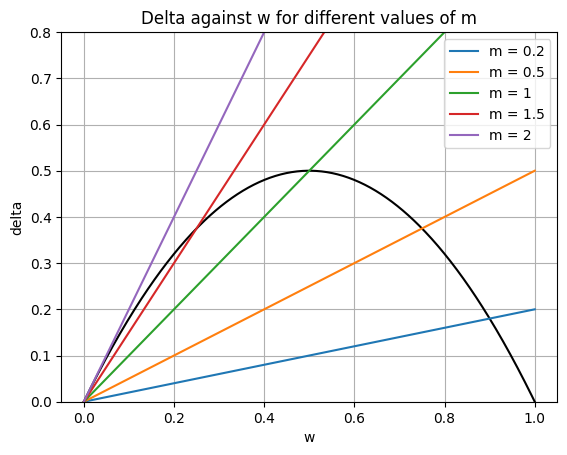

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for w and Plotkin bound
w = np.linspace(0, 1, 500)
delta_plotkin = 2 * w * (1 - w)
plt.plot(w, delta_plotkin, color='black')

# Values of m for the linear functions
m_values = [0.2, 0.5, 1, 1.5, 2]

# Plot the linear functions
for m in m_values:
    delta_linear = m * w
    plt.plot(w, delta_linear, label=f'm = {m}')

# Adding labels, title, and legend
plt.xlabel('w')
plt.ylabel('delta')
plt.ylim(0, 0.8)
plt.title('Delta against w for different values of m')
plt.legend()
plt.grid(True)
plt.show()

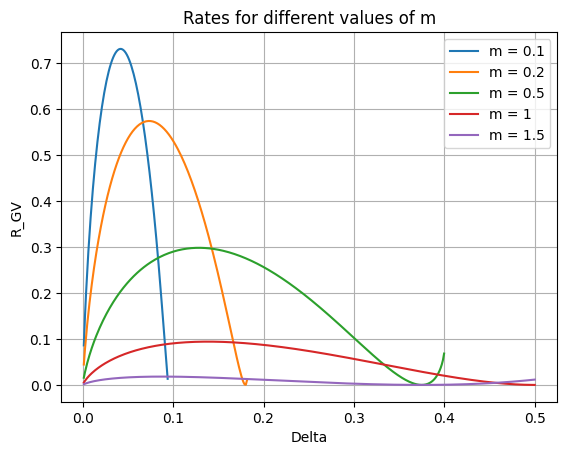

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def R_GV(delta, m):
    # Ensure that arguments of log functions are positive
    if delta > 0 and m > 0 and delta < m and delta < (2*m)/(m+2):
        R_GV = 2 * (- (delta / m) * np.log2(delta / m) - (1 - delta / m) * np.log2(1 - delta / m)) + (1 - delta / m - delta / 2) * np.log2(1 - delta / m - delta / 2) + delta * np.log2(delta / 2) + (delta / m - delta / 2) * np.log2(delta / m - delta / 2)
        return R_GV
    else:
        return np.nan  # Return NaN for values outside the domain

# Values of m
m_values = [0.1, 0.2, 0.5, 1, 1.5]

# Plot for a range of delta values
del_vals = np.linspace(0, 0.5, 400)
for m in m_values:
    y_values = [R_GV(delta, m) for delta in del_vals]
    plt.plot(del_vals, y_values, label=f'm = {m}')

# Adding labels and legend
plt.xlabel('Delta')
plt.ylabel('R_GV')
plt.title('Rates for different values of m')
plt.legend()
plt.grid(True)
plt.show()

*  As shown in the 𝛿 against $w$ plot, there is a specific range of $m$ values which satisfy the Plotkin bound: $0 < m < 2$. Furthermore, $w_{max}$ is also clearly dependent upon $m$. The relationship between $m$ and $w_{max}$ is given by:

$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ mw_{max} = 2w_{max}(1-w_{max}) ⇒ w_{max}((2-m)-2w)=0 ⇒ w_{max} = 1 - \frac{m}{2}.$

*  In the code, fac_data is used to relate 𝛿 and $w$: $w$ = fac_data[i]*𝛿. Therefore, as $𝛿 = mw$, fac_data $= \frac{1}{m}$ and so ranges between $(\frac{1}{2}, ∞)$. However, as the Plotkin bound is tighter than $w = \frac{𝛿}{2}$, the lower limit for $w$ will remain as $\frac{1-\sqrt{1-2𝛿}}{2}$. Furthermore, the upper bound for $w$ should be 1 as this is the maximum weight, but of course this does not necessitate that max_frac = 1.

*  As shown in the $R_{GV}$ against 𝛿 plot, the GV-rate is positive for all $m$ but, as $m$ decreases, the range of possible values of 𝛿 decreases (as expected, as now the maximum $𝛿 = mw_{max} = m(1-\frac{m}{2})$) and the maximum GV-rate increases. As 𝛿 $= mw$, this infers that the GV-rate increases as $\frac{𝛿}{w} → 0$. Conceptually, it makes sense that as relative distance $𝛿$ decreases, for a given relative weight, there is a denser packing in the Hamming space, and so the rate increases; thus, it is expected that the peak moves up and to the left as $m$ decreases.

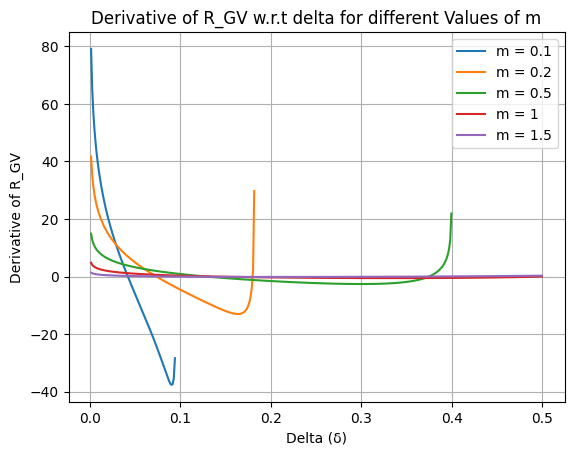

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dR_GV(delta, m):
    # Ensure that arguments of log functions are positive
    if delta > 0 and m > 0 and delta < m and delta < (2*m)/(m+2):
        dR_GV = (m*(np.log2(delta/2) + 1) - m - (m - 2)*np.log2(delta*(2 - m)/(2*m))/2 - (m + 2)*np.log2((-2*delta + m*(2 - delta))/(2*m))/2 - 2*np.log2(delta/m) + 2*np.log2((-delta + m)/m))/(m*np.log(2))
        return dR_GV
    else:
        return np.nan  # Return NaN for values outside the domain

# Values of m
m_values = [0.1, 0.2, 0.5, 1, 1.5]

# Plot for a range of delta values
del_vals = np.linspace(0, 0.5, 400)
for m in m_values:
    y_values = [dR_GV(delta, m) for delta in del_vals]
    plt.plot(del_vals, y_values, label=f'm = {m}')

plt.title('Derivative of R_GV w.r.t delta for different Values of m')
plt.xlabel('Delta (δ)')
plt.ylabel('Derivative of R_GV')
plt.legend()
plt.grid(True)
plt.show()

The derivatives for different $m$ show that the $𝛿_{max}$, corresponding to $R_{max}$, does indeed increase with increasing $m$. As $m → 0$, we therefore expect $𝛿_{max} → 0$ and $R_{max} → 1$, which confirms the discussion in the previous subsection. To investigate this, the surface plot of $R_{GV}$ against both 𝛿 and $w$ has been provided below. First, the overall function is plotted, and then only the points which satisfy the Plotkin bound. In both cases, the maximum value of $R_{GV}$ and the corresponding values of $w$ and $𝛿$ are also outputted.


<ipython-input-24-ef31d713d68c>:8: RuntimeWarning: invalid value encountered in log
  term2 = (1 - w - delta / 2) * np.log(1 - w - delta / 2)
<ipython-input-24-ef31d713d68c>:10: RuntimeWarning: invalid value encountered in log
  term4 = (w - delta / 2) * np.log(w - delta / 2)



Maximum Value of the Function: 0.6436616649185605
Corresponding w: 0.495050505050505
Corresponding delta: 0.99


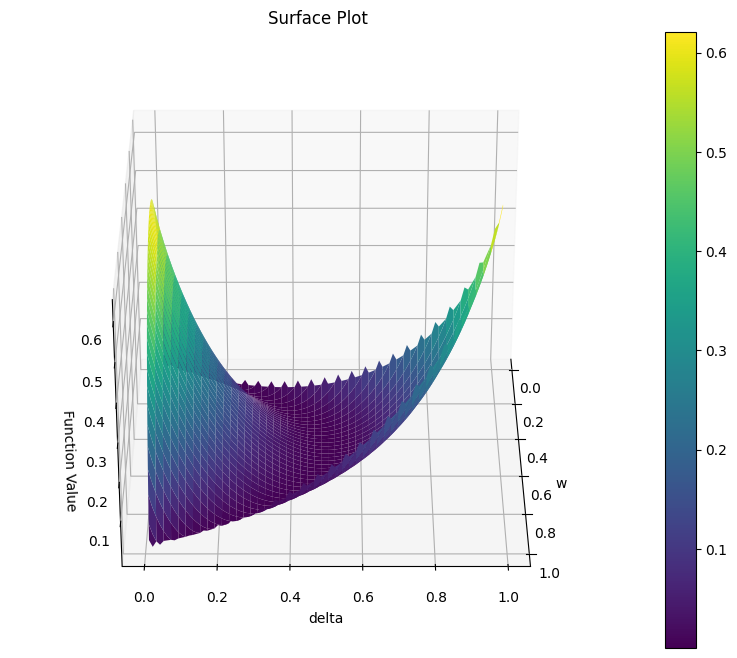

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def my_function(w, delta):
    term1 = 2 * (-w * np.log(w) - (1 - w) * np.log(1 - w))
    term2 = (1 - w - delta / 2) * np.log(1 - w - delta / 2)
    term3 = delta * np.log(delta / 2)
    term4 = (w - delta / 2) * np.log(w - delta / 2)
    return term1 + term2 + term3 + term4

# Create a meshgrid
w = np.linspace(0.01, 0.99, 100)  # Avoiding values that make the log function undefined
delta = np.linspace(0.01, 0.99, 100)  # Same here
W, Delta = np.meshgrid(w, delta)

# Evaluate the function
Z = my_function(W, Delta)

# Find the maximum value and its indices
max_value = np.nanmax(Z)
max_indices = np.unravel_index(np.nanargmax(Z), Z.shape)
max_w = W[max_indices]
max_delta = Delta[max_indices]

print()
print("Maximum Value of the Function:", max_value)
print("Corresponding w:", max_w)
print("Corresponding delta:", max_delta)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Set the view angle
ax.view_init(elev=30, azim=0)
surf = ax.plot_surface(W, Delta, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('w')
ax.set_ylabel('delta')
ax.set_zlabel('Function Value')
ax.set_title('Surface Plot')
plt.colorbar(surf)
plt.show()

Maximum Value of the Function: 0.6888502529984275
Corresponding w: 0.5004504504504504
Corresponding delta: 0.0004994994994994995


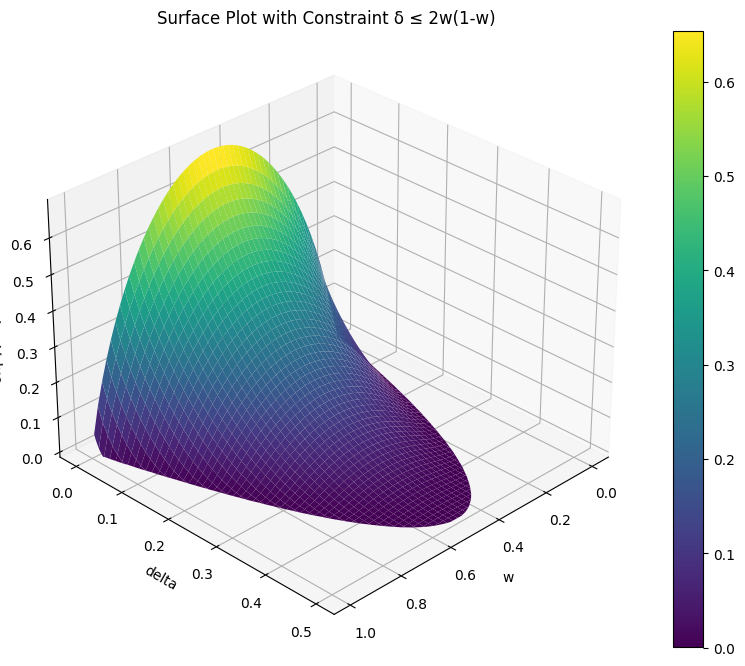

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def RGV(w, delta):
    with np.errstate(divide='ignore', invalid='ignore'):
        valid = delta <= 2 * w * (1 - w) # Plotkin bound
        term1 = 2 * (-w * np.log(w) - (1 - w) * np.log(1 - w))
        term2 = (1 - w - delta / 2) * np.log(1 - w - delta / 2)
        term3 = delta * np.log(delta / 2)
        term4 = (w - delta / 2) * np.log(w - delta / 2)
        result = term1 + term2 + term3 + term4
        result[~valid] = np.nan  # Set invalid points to NaN
        return result

# Create a meshgrid
w = np.linspace(0.0, 0.99, 1000)
delta = np.linspace(0.0, 0.499, 1000)
W, Delta = np.meshgrid(w, delta)

# Evaluate the function
Z = RGV(W, Delta)

# Find the maximum value and its indices
max_value = np.nanmax(Z)
max_indices = np.unravel_index(np.nanargmax(Z), Z.shape)
max_w = W[max_indices]
max_delta = Delta[max_indices]

print("Maximum Value of the Function:", max_value)
print("Corresponding w:", max_w)
print("Corresponding delta:", max_delta)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Set the view angle
ax.view_init(elev=30, azim=45)
surf = ax.plot_surface(W, Delta, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('w')
ax.set_ylabel('delta')
ax.set_zlabel('Function Value')
ax.set_title('Surface Plot with Constraint δ ≤ 2w(1-w)')
plt.colorbar(surf)
plt.show()

This demonstrates that $R_{GV}$ increases as $𝛿 → 0$, as expected, and also increases as $w → 0.5$. Therefore, $m$ → 0 (or equally fac_data $ → \infty$) for $R_{GV} → 1$. So, we could explore varying the upper limit of fac_data (max_fac) and see how increasing this above 1 affects the excess rate over GV. Could this potentially lead to a denser coding (of satellite codewords) than the $𝛿 = w$? We will explore this in the following section.


## 2. Code Analysis: exploring the relationship between $R_{excess}$ (rate excess over GV), $w_{max}$, and relative distance 𝛿.

### *a) Varying upper limit of max_fac*

Firstly, in the program (from long-shot.ipynb) which serves as a testbed for specific values of delta, the upper limit for max_fac is varied for 𝛿 = 0.16. These graphs, for max_fac = 1.0, 2.0, 5.0, and 10.0, are plotted below.

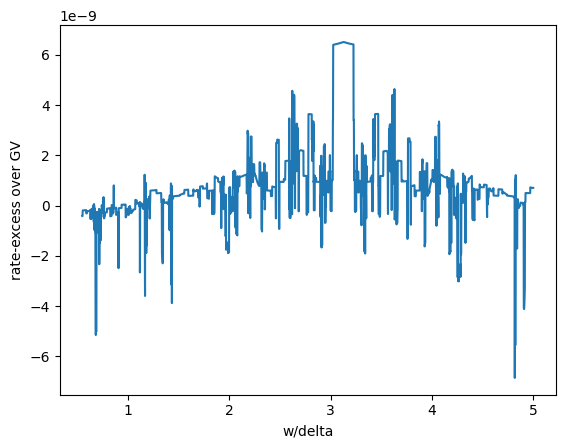

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy

delta = 0.16                # This program is a testbed for specific values of delta -- the next one iterates over different delta values
entdelta = entropy([delta,1-delta], base=2)      # H(\delta)

max_fac = 5.0
min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
step_size = 0.001

fac_data=np.arange(min_fac,max_fac,step_size)
y_data=np.arange(min_fac,max_fac,step_size)

i=0
for fac in fac_data:
  w = delta*fac_data[i]
  T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]   ## See comment on next row
  rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)   ## The weight-constrained GV rate is given by this formula -- see the first baseline calculation
  entw = entropy([w,1-w], base=2)
  x = cp.Variable(8,pos=True)

### The 8 entries of x correspond to the 8 entries of p_{XC'X'}. In particular, for i \in \{0,...,7}, let i = (a,b,c) in binary. Then x[i] denotes p_{XC'X'}(a,b,c)

  obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))       ## As above, the worst-case joint distribution corresopnds to the maximizing H(X,C',X') satisfying constraints (below)
  constraints=[]
  constraints += [cp.sum(x) == 1]
  constraints += [x[1]+x[2]+x[5]+x[6] == w]             ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) = w, i.e., d_{H}(c',x') = nw, since x' is a satellite codeword of c'
  constraints += [x[4]+x[5]+x[6]+x[7] == w]             ## This denotes the constraint p_{XC'X'}(1,0,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) + p_{XC'X'}(1,1,1) = w, i.e., wt_{H}(x) = nw, since x is a satellite codeword of \underline{0}
  constraints += [x[1]+x[3]+x[4]+x[6] <= delta]         ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,1) + p_{XC'X'}(1,0,0) + p_{XC'X'}(1,1,0) \leq \delta, i.e., d_{H}(x,x') \leq n\delta, since x' in the Hamming ball of radius n\delta around x for "bad" types
  prob = cp.Problem(obj, constraints)
  prob.solve()
  y_data[i] = min(2*entw+entdelta-prob.value,rgv)       ## As noted above, the rate sustainable corresponds to the minimum of two quantities, corresponding to expurgation by another satellite codeword of the same cloud (the second term, rgv), and expurgation by a codeword of a different cloud (the first term)
  i = i+1

fac_datap = fac_data[1:len(fac_data)]
y_datap = y_data[1:len(y_data)]

fig = plt.figure()
plt.plot(fac_datap,y_datap, color='tab:blue')
plt.xlabel("w/delta")
plt.ylabel("rate-excess over GV")
plt.show()

The $R_{excess}$ graphs for different values of max_fac are shown below.

*   The max_fac is initially set to the original conditions (max_fac = 1.0). This outputs the same result at the long-shot.ipynb.
*   When max_fac is set to 2.0, as shown in the second graph, there seems to be a steady increase in rate as $w/𝛿$ increases, although there is a large amount of noise and sharp drops with negative rate.
*   When the max_fac is set to 5.0, there is an evident peak at $w/ 𝛿 ≈ 3.2$, after which the rate begins to steadily decrease. In fact, there seem to be a range of $w/ 𝛿$ values which approximately correspond to the peak. It is worthwhile to run this with greater resolution. Note that the $R_{max}$ is around six times greater than the case of max_frac = 1.0.
*   The max_fac was set to 10.0, as an extreme case. It is expected that this function should not surpass $w/𝛿$ = 6.25 as 6.25 x 0.16 = 1 which is the maximum weight. This is indeed observed, and by ouputting the explicit values of y_max, it is confirmed that this sudden increase is due to $H(X, C', X') → -∞$.

To generalise, for a given value of $𝛿$, we expect the maximum $w/𝛿$ to be given by 1/𝛿. Therefore, this provides the upper bound on $w/𝛿$ (max_fac), so the suitable range for fac_data is thus given by $(\frac{1-\sqrt{1-2𝛿}}{2𝛿}, \frac{1}{𝛿})$.

The peak also seems to have a dependance on $𝛿$ and occurs roughly at max_fac $= \frac{1}{2𝛿} $ which corresponds to $w=\frac{1}{2}$. This will be analysed further, as the 𝛿 wrapper code can be updated to extract these $w_{max}$ values.

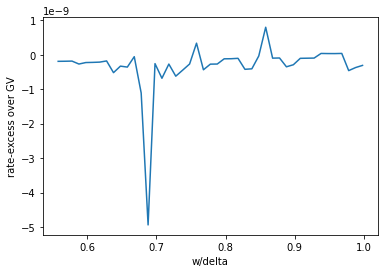
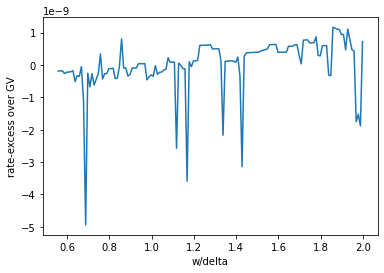
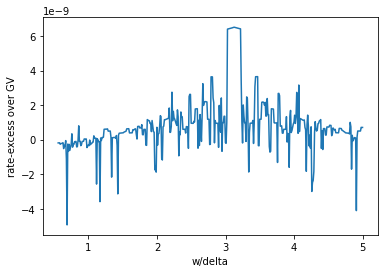
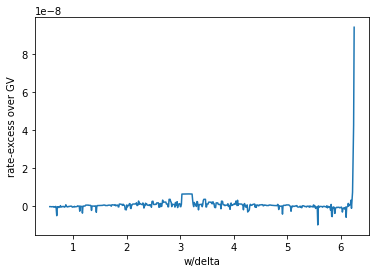

The code is rerun with higher resolution around the central peak, for $𝛿 = 0.16$. These outputs are shown below. Thus, this peak does extend over a range of $w/𝛿$ values, and this range appears to depend on 𝛿. This is repeated for $𝛿 = 0.1$ and $𝛿 = 0.2$, shown in the red and green graphs respectively. As shown, the $R_{excess}$ seems to increase with delta, and the peak also shifts to the left (as expected). However, the peak seems to become inverted for certain values of $𝛿$? Needs further analysis.

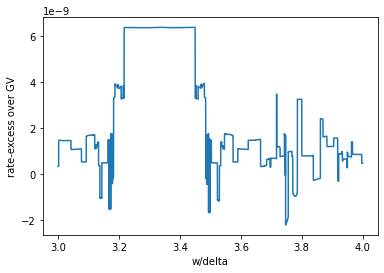
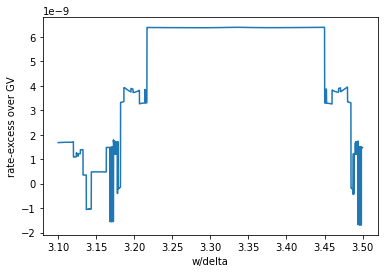

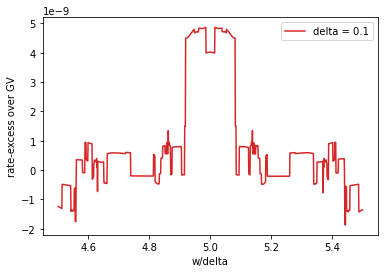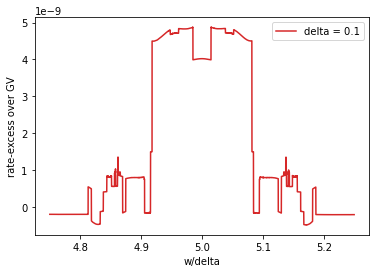

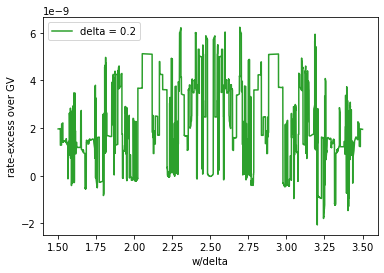
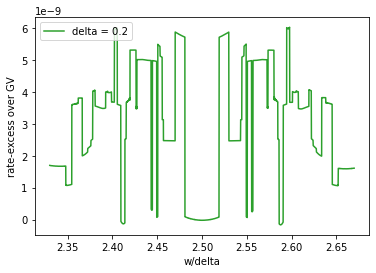

### *b) Outputting best weight*
To clarify this relationship between the maximum value of $R_{excess}$ and 𝛿 further, the 𝛿-wrapper code (from long-shot.ipynb) can be used. Before analysing the code, it is useful to consider outputting the best weight from each delta. The 𝛿-wrapper code has been updated to output the best value of $w$ (i.e. the value which maximises the $R_{excess}$ (rate excess over GV)) for every value of 𝛿 between 0.001 to 0.499. Initially, the same range of $w$ was used as the original code (max_fac ranges between value corresponding to Plotkin point and 1.0).

delta =  0.001
rate excess over GV for this delta =  9.980984220364642e-08
best w for this delta =  0.000620250250312917
delta =  0.002
rate excess over GV for this delta =  3.9365992160478314e-08
best w for this delta =  0.000520250250312917
delta =  0.003


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rate excess over GV for this delta =  4.9593556455951315e-08
best w for this delta =  0.0007002502503129171
delta =  0.004
rate excess over GV for this delta =  5.093064660288693e-08
best w for this delta =  0.0006402502503129171
delta =  0.005
rate excess over GV for this delta =  4.204690320919191e-08
best w for this delta =  0.0005402502503129169
delta =  0.006
rate excess over GV for this delta =  3.501657248883294e-08
best w for this delta =  0.000530250250312917
delta =  0.007
rate excess over GV for this delta =  3.1607958750345944e-08
best w for this delta =  0.000510250250312917
delta =  0.008
rate excess over GV for this delta =  3.169179516038234e-08
best w for this delta =  0.000510250250312917
delta =  0.009
rate excess over GV for this delta =  2.8730163581514034e-08
best w for this delta =  0.000530250250312917
delta =  0.01
rate excess over GV for this delta =  2.090657960640563e-08
best w for this delta =  0.0005502502503129169
delta =  0.011
rate excess over GV for th

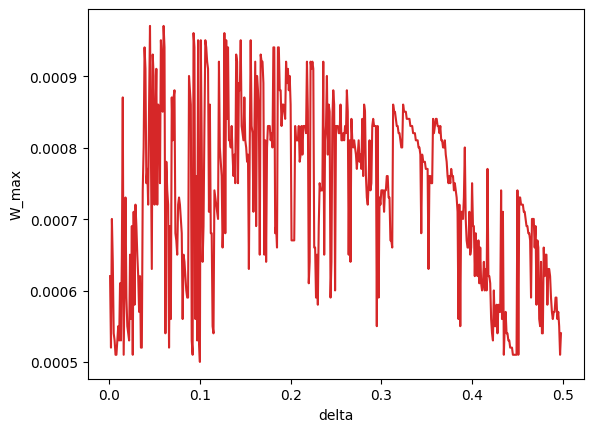

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

del_vals=[]
y_max=[]

# Creating array to store w_max values
w_max = []

for x in range(1, 499, 1):
  delta = x/1000
  print("delta = ", delta)
  del_vals.append(delta)
  entdelta = entropy([delta,1-delta], base=2)

  max_fac = 1.0
  min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
  step_size = 0.01

  fac_data=np.arange(min_fac,max_fac,step_size)
  y_data=np.arange(min_fac,max_fac,step_size)
  w_data=np.arange(min_fac,max_fac,step_size)

  i=0
  for fac in fac_data:
    w = delta*fac_data[i]
    w_data[i] = w
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)
    x = cp.Variable(8,pos=True)
    obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))
    constraints=[]
    constraints += [cp.sum(x) == 1]
    constraints += [x[1]+x[2]+x[5]+x[6] == w]
    constraints += [x[4]+x[5]+x[6]+x[7] == w]
    constraints += [x[1]+x[3]+x[4]+x[6] <= delta]
    prob = cp.Problem(obj, constraints)
    prob.solve()
    y_data[i] = min(2*entw+entdelta-prob.value,rgv)
    i = i+1

  y_max.append(max(y_data))
  w_max.append(w_data[np.argmax(y_data)])
  print("rate excess over GV for this delta = ", max(y_data))
  print("best w for this delta = ", w_data[np.argmax(y_data)])

fig = plt.figure()
plt.plot(del_vals,w_max, color='tab:red')
plt.xlabel("delta")
plt.ylabel("W_max")
plt.show()

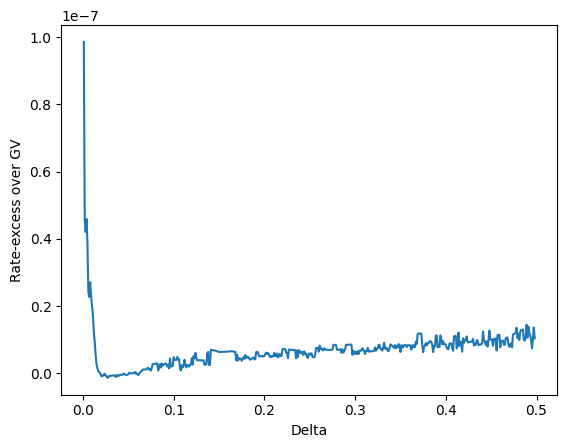

In [ ]:
fig = plt.figure()
plt.plot(del_vals,y_max,color='tab:blue')
plt.xlabel("Delta")
plt.ylabel("Rate-excess over GV")
plt.show()

This corresponds to the result in long-shot.ipynb, as expected. Note that the outputs demonstrate that the rate is postive, and the $w_{max}$ against 𝛿 (red graph) is relatively noisy when the upper bound is 𝛿 (i.e. max_frac = 1.0).

The upper bound is now updated to (1/𝛿), due to the results in last section; however, this will be multiplied by a factor such as 0.95 or 0.9 to ensure that the sharp increase at the end does not affect the max y_data carried forward. Note also, for ease of comparison, max_fac will be plotted instead of $w_{max}$ here on.

delta =  0.001
rate excess over GV for this delta =  9.980984220364642e-08
best w for this delta =  0.620250250312917
delta =  0.002
rate excess over GV for this delta =  5.778529198197102e-08
best w for this delta =  1.8602502503129181
delta =  0.003
rate excess over GV for this delta =  6.514771878907144e-08
best w for this delta =  1.2502502503129176
delta =  0.004
rate excess over GV for this delta =  5.093064660288693e-08
best w for this delta =  0.640250250312917
delta =  0.005
rate excess over GV for this delta =  4.204690320919191e-08
best w for this delta =  0.540250250312917
delta =  0.006
rate excess over GV for this delta =  3.501657248883294e-08
best w for this delta =  0.530250250312917
delta =  0.007
rate excess over GV for this delta =  3.1607958750345944e-08
best w for this delta =  0.5102502503129169
delta =  0.008
rate excess over GV for this delta =  3.169179516038234e-08
best w for this delta =  0.5102502503129169
delta =  0.009
rate excess over GV for this delta =

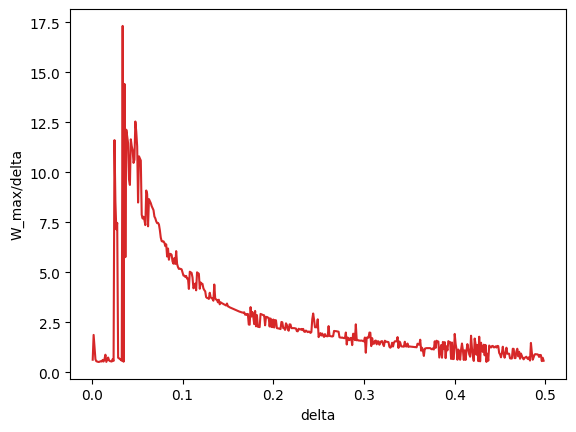

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

del_vals=[]
y_max=[]

# Creating arrays to store w_max values
w_max = []

for x in range(1, 49, 1):
  delta = x/100
  print("delta = ", delta)
  del_vals.append(delta)
  entdelta = entropy([delta,1-delta], base=2)

  max_fac = 0.9*(1/delta)
  min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
  step_size = 0.1

  fac_data=np.arange(min_fac,max_fac,step_size)
  y_data=np.arange(min_fac,max_fac,step_size)
  w_data=np.arange(min_fac,max_fac,step_size)

  i=0
  for fac in fac_data:
    w = delta*fac_data[i]
    w_data[i] = fac_data[i]
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)
    x = cp.Variable(8,pos=True)
    obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))
    constraints=[]
    constraints += [cp.sum(x) == 1]
    constraints += [x[1]+x[2]+x[5]+x[6] == w]
    constraints += [x[4]+x[5]+x[6]+x[7] == w]
    constraints += [x[1]+x[3]+x[4]+x[6] <= delta]
    prob = cp.Problem(obj, constraints)
    prob.solve()
    y_data[i] = min(2*entw+entdelta-prob.value,rgv)
    i = i+1

  y_max.append(max(y_data))
  w_max.append(w_data[np.argmax(y_data)])
  print("rate excess over GV for this delta = ", max(y_data))
  print("best w for this delta = ", w_data[np.argmax(y_data)])

fig = plt.figure()
plt.plot(del_vals,w_max, color='tab:red')
plt.xlabel("delta")
plt.ylabel("W_max")
plt.show()

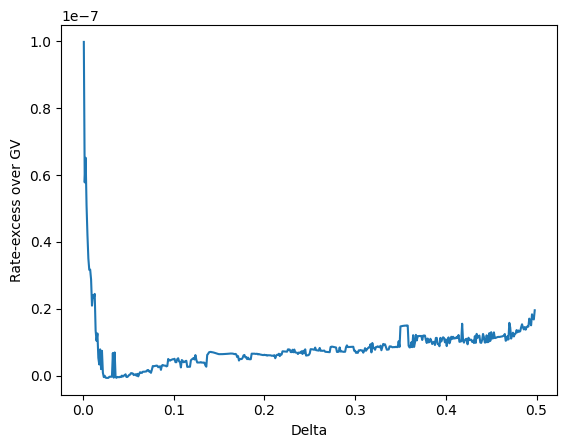

In [ ]:
fig = plt.figure()
plt.plot(del_vals,y_max,color='tab:blue')
plt.xlabel("Delta")
plt.ylabel("Rate-excess over GV")
plt.show()

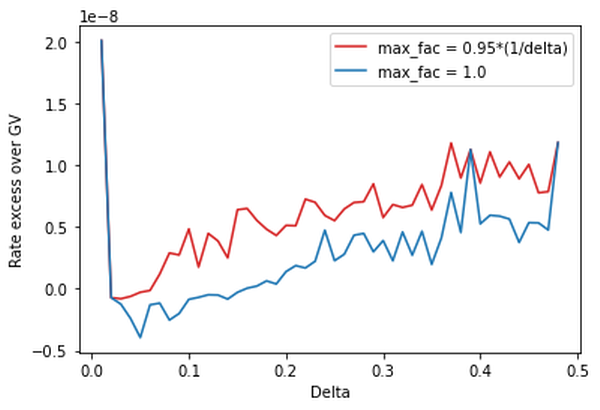

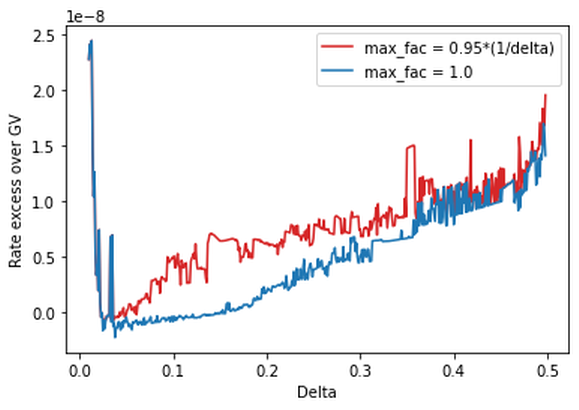

The output data from the two runs (with different upper limits) have been plotted on the same graph. The second test (bottom graph) has higher resolution. As shown, there is a marked improvement for all values of 𝛿, with a rate equal to or greater than the rate with the upper bound of 1.0.


Aside: the y_max values printed in long-shot.ipynb (0.0065462798055886395,
 0.006399795928497598, 0.0062534063097408055, etc.) were significantly larger than ones obtained when running the code with the same bounds. Not sure why there is a discrepancy?

### c) Limiting rate

It is interesting to consider whether internal or external expurgation (i.e. due to satellites on the same or different clouds) is limiting the rate more. The number of instances in which the external expurgation is limiting have been outputted below. The counter total stores the total number of (𝛿, w) cases, whereas ext_cloud stores the cases in which $2H(w)+H(\delta)-max_{p_{X,C',X'}}H(X,C',X') < R_{GV}$.

delta =  0.01
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.02
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.03
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.04
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.05
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.06
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.07
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.08
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.09
For this delta, total ratio of cases in which ext. codewords are limiting rate: 100.0 %
delta =  0.1
For this delta, total ratio of cases in which ext. codewords are limi

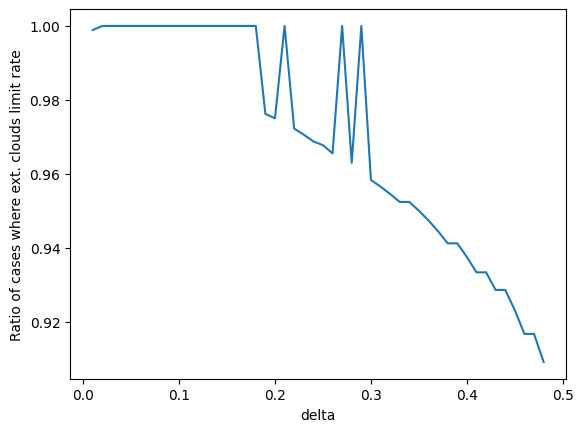

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy

del_vals=[]
y_max=[]
w_max = []
w_vals = []

# Store overall ratios, and those corresponding to y_max, w_max
ratio = []
r_data =[]
ratio_max =[]

for x in range(1, 49, 1):
  delta = x/100
  print("delta = ", delta)
  del_vals.append(delta)
  entdelta = entropy([delta,1-delta], base=2)

  max_fac = 0.9*(1/delta)
  min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
  step_size = 0.1

  fac_data=np.arange(min_fac,max_fac,step_size)
  y_data=np.arange(min_fac,max_fac,step_size)

  i=0
  ext_cloud = 0
  total = 0
  for fac in fac_data:
    w = delta*fac_data[i]
    w_vals.append(fac_data[i])
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)
    x = cp.Variable(8,pos=True)
    obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))
    constraints=[]
    constraints += [cp.sum(x) == 1]
    constraints += [x[1]+x[2]+x[5]+x[6] == w]
    constraints += [x[4]+x[5]+x[6]+x[7] == w]
    constraints += [x[1]+x[3]+x[4]+x[6] <= delta]
    prob = cp.Problem(obj, constraints)
    prob.solve()
    entgap = 2*entw+entdelta-prob.value
    y_data[i] = min(entgap,rgv)
    total += 1
    if rgv > entgap:
       ext_cloud += 1
       r_data.append(1)
    else:
       r_data.append(0)
    i = i+1

  y_max.append(max(y_data))
  pos = np.argmax(y_data)
  w_max.append(w_vals[pos])
  ratio_max.append(r_data[pos])
  ratio.append(ext_cloud/total)
  print("For this delta, total ratio of cases in which ext. codewords are limiting rate:",np.round(100*(ext_cloud/total)),"%")

fig = plt.figure()
plt.plot(del_vals,ratio,color='tab:blue')
plt.xlabel("delta")
plt.ylabel("Ratio of cases where ext. clouds limit rate")
plt.show()

The high ratios (>90%) suggest that it is not satellite codewords on the same cloud that are limiting the overall rate, but rather those on nearby clouds. This explains why the overall rate does not improve significantly as max_fac is improved - as $R_{GV}$ is not the limiting rate when performing $\max_{w}\min (R_{GV}(w,\delta),2H(w)+H(\delta)-max_{p_{X,C',X'}}H(X,C',X'))$. This second function needs to be analysed further to determine the maximising values of $w$ and $𝛿$. A similar analysis will be performed for this function, and the optimiser for H(X,C',X') needs to be investigated.

Note that the counters include all instances of $(𝛿, w)$; to see which affect $R_{excess}$ directly, the ratios corresponding to the y_max value (best rate excess for a given 𝛿) should be outputted. This is done below.![3.png](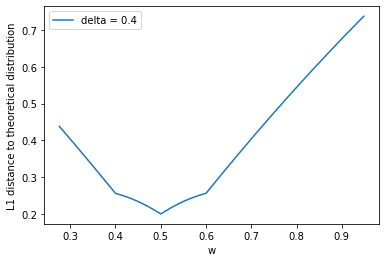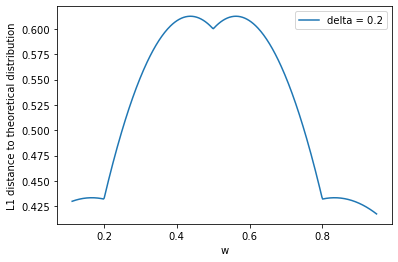)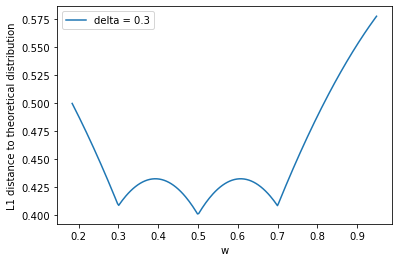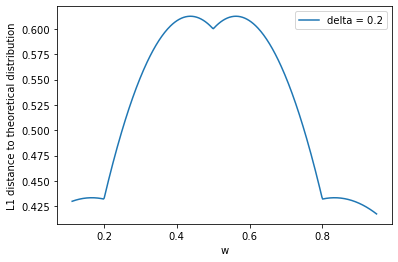



In [ ]:
ratio_max

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

As shown, all of the ratios are 1 - this essentially means that $R_{GV}$ is not limiting $R_{excess}$, and although there may be $(𝛿, w)$ pairs in which $R_{GV} < 2H(w)+H(\delta)-max_{p_{X,C',X'}}H(X,C',X') $, these are not relevant for the evaluation of $R_{excess}$. Therefore, going forward, the task will be to maximise $2H(w)+H(\delta)-max_{p_{X,C',X'}}H(X,C',X')$ with respect to $w$.

### d) $R_{excess}$

As outlined above, the rate is being limited by:

$$ R_{excess} = 2H(w)+H(\delta)-max_{p_{X,C',X'}}H(X,C',X') $$

This can also be visualised as a surface plot against 𝛿 and $w$, as shown below - although the performance of the optimiser may need to be further analysed (will be explored in later section).

Maximum Value of the Function: 1.3474187099404844e-08
Minimum Value of the Function: -1.3793187259025785e-08
Corresponding w: 0.5091836734693878
Corresponding delta: 0.48000000000000004


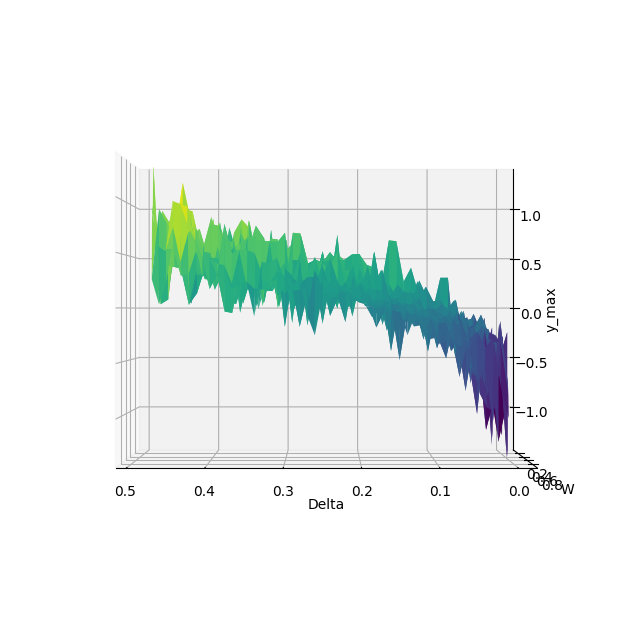

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Parameters
delta_range = np.arange(0.01, 0.49, 0.01)  # Delta range
w_range = np.linspace(0.05, 0.95, 50)  # Fixed w range, independent of delta

# Initialize arrays for data collection
DELTA, W = np.meshgrid(delta_range, w_range)
y_vals = np.full(DELTA.shape, np.nan)  # Initialize with NaNs

# Loop through each combination of delta and w
for i, delta in enumerate(delta_range):
    entdelta = entropy([delta, 1 - delta], base=2)
    for j, w in enumerate(w_range):
        if delta <= 2 * w * (1 - w):  # Check the condition
            T = [1 - w - delta / 2, delta / 2, delta / 2, w - delta / 2]
            rgv = 2 * entropy([w, 1 - w], base=2) - entropy(T, base=2)
            entw = entropy([w, 1 - w], base=2)

            # Convex optimization problem
            x = cp.Variable(8, pos=True)
            obj = cp.Maximize(cp.sum(cp.entr(x)) / np.log(2))
            constraints = [cp.sum(x) == 1,
                           x[1] + x[2] + x[5] + x[6] == w,
                           x[4] + x[5] + x[6] + x[7] == w,
                           x[1] + x[3] + x[4] + x[6] <= delta]
            prob = cp.Problem(obj, constraints)
            prob.solve()

            entgap = 2 * entw + entdelta - prob.value
            y_vals[j, i] = min(entgap, rgv)
        else:
            # Condition not met, leave as NaN
            pass

# Find the maximum value and its indices
max_value = np.nanmax(y_vals)
min_value = np.nanmin(y_vals)
max_indices = np.unravel_index(np.nanargmax(y_vals), y_vals.shape)
max_w = W[max_indices]
max_delta = DELTA[max_indices]

print("Maximum Value of the Function:", max_value)
print("Minimum Value of the Function:", min_value)
print("Corresponding w:", max_w)
print("Corresponding delta:", max_delta)


# 3D Surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(DELTA, W, y_vals, cmap='viridis')
ax.view_init(elev=0, azim=90)
ax.set_xlabel('Delta')
ax.set_ylabel('W')
ax.set_zlabel('y_max')

plt.show()

## e) $p_{C X C' X'}$



The Markov chain which precisely hits the GV bound is given by: $$ p_{C X C' X'} = p_C \ p_{X|C} \ p_{X'|X} \ p_{C'|X'} $$

where $p_C$ corresponds to Bernoulli$ \left(\frac{1}{2}\right)$, $p_{X|C}$ corresponds to BSC($w$), $p_{X'|X}$ corresponds to BSC($ 𝛿$) and $p_{X'|X}$ corresponds to BSC($w$). These distributions are given by:
$$ \begin{align*}
p_C &= \begin{bmatrix} 0.5, & 0.5 \end{bmatrix} \\
p_{X|C} &= \begin{bmatrix} 1 - w, & w \end{bmatrix} \\
p_{X'|X} &= \begin{bmatrix} 1 - 𝛿, & 𝛿 \end{bmatrix} \\
p_{C'|X'} &= \begin{bmatrix} 1 - w, & w \end{bmatrix}
\end{align*}
$$
Therefore:
$$\begin{align*}
p_{C X C' X'} = \begin{bmatrix} 0.5, & 0.5 \end{bmatrix} \otimes \begin{bmatrix} 1 - w, & w \end{bmatrix} \otimes \begin{bmatrix} 1 - 𝛿, & 𝛿 \end{bmatrix} \otimes \begin{bmatrix} 1 - w, & w \end{bmatrix} \\
= 0.5 \begin{bmatrix} 1 - w, & w \\ 1 - w, & w \end{bmatrix} \otimes \begin{bmatrix} (1 - 𝛿)(1 - w) & w(1 - 𝛿) \\ 𝛿(1 - w) & w𝛿 \end{bmatrix} \\
= 0.5 \begin{bmatrix} \begin{bmatrix} (1 - 𝛿)(1 - w)^2 & w(1 - 𝛿)(1 - w) \\ 𝛿(1 - w)^2 & w𝛿(1 - w) \end{bmatrix} \begin{bmatrix} w(1 - 𝛿)(1 - w) & w^2(1 - 𝛿) \\ w𝛿(1 - w) & w^2𝛿 \end{bmatrix} \\ \begin{bmatrix} (1 - 𝛿)(1 - w)^2 & w(1 - 𝛿)(1 - w) \\ 𝛿(1 - w)^2 & w𝛿(1 - w) \end{bmatrix} \begin{bmatrix} w(1 - 𝛿)(1 - w) & w^2(1 - 𝛿) \\ w𝛿(1 - w) & w^2𝛿 \end{bmatrix}  \end{bmatrix}
\end{align*} $$

The aim is to ensure that the joint distribution produced by the optimizer is "close" in $\ell_1$ distance to the quantization error observed and therefore whether the distribution conforms to a Markov chain of the specified form.

If 𝛿 = w:
$$\begin{align*}
p_{C X C' X'} (𝛿, w) = 0.5 \begin{bmatrix} \begin{bmatrix} (1 - 𝛿)^3 & 𝛿(1 - 𝛿)^2 \\ 𝛿(1 - 𝛿)^2 & 𝛿^2(1 - 𝛿) \end{bmatrix} \begin{bmatrix} 𝛿(1 - 𝛿)^2 & 𝛿^2(1 - 𝛿) \\ 𝛿^2(1 - 𝛿) & 𝛿^3 \end{bmatrix} \\ \begin{bmatrix} (1 - 𝛿)^3 & 𝛿(1 - 𝛿)^2 \\ 𝛿(1 - 𝛿)^2 & 𝛿^2(1 - 𝛿) \end{bmatrix} \begin{bmatrix} 𝛿(1 - 𝛿)^2 & 𝛿^2(1 - 𝛿) \\ 𝛿^2(1 - 𝛿) & 𝛿^3 \end{bmatrix}  \end{bmatrix}
\end{align*} $$

This appears to be in agreement with the extremising distributions obtained from longshot.ipynb. When 𝛿 = 0.1, w = 0.1:
$$
p_{C X C' X'} (0.1, 0.1) = 0.5 \begin{bmatrix} \begin{bmatrix} 0.729 & 0.081 \\ 0.081 & 0.009 \end{bmatrix} \begin{bmatrix} 0.081 & 0.009 \\ 0.009 & 0.001 \end{bmatrix} \\ \begin{bmatrix} 0.729 & 0.081 \\ 0.081 & 0.009 \end{bmatrix} \begin{bmatrix} 0.081 & 0.009 \\ 0.009 & 0.001 \end{bmatrix} \end{bmatrix}
$$

This can be used to test the obtained distribution in Python, as shown below.

In [ ]:
import numpy as np

delta = 0.1
w = 0.1

# Assuming a Markov chain
p_C = [0.5, 0.5]  # Bernoulli(1/2)
p_X_given_C = [1 - w, w]  # BSC(w)
p_Xp_given_X = [1 - delta, delta]  # BSC(delta)
p_Cp_given_Xp = [1 - w, w]  # BSC(w)

# Joint distribution of C and X
p_CX = np.outer(p_C, p_X_given_C)
p_XpCp = np.outer(p_Xp_given_X, p_Cp_given_Xp)
p_CXCpXp = np.outer(p_CX, p_XpCp)

print(p_CXCpXp)

[[0.3645 0.0405 0.0405 0.0045]
 [0.0405 0.0045 0.0045 0.0005]
 [0.3645 0.0405 0.0405 0.0045]
 [0.0405 0.0045 0.0045 0.0005]]


This does agree with the  𝛿 = 0.1, w = 0.1 output above. And np.sum(p_CXCpXp)
does indeed give 1, as required.

x.value is the array representing the optimized probability distribution (in the original code). This array can then be compared against the theoretical distribution derived above to determine whether the optimiser is performing correctly. This will be done by calculating the $\ell_1$ distance between the theoretical and optimised distributions. In Python, the numpy.linalg.norm function can be used with the parameter ord=1 on the difference of the two probability vectors.

In [ ]:
import numpy as np
import cvxpy as cp
from scipy.stats import entropy

delta = 0.1
w = 0.1

# Assuming a Markov chain
p_C = [0.5, 0.5]  # Bernoulli(1/2)
p_X_given_C = [1 - w, w]  # BSC(w)
p_Xp_given_X = [1 - delta, delta]  # BSC(delta)
p_Cp_given_Xp = [1 - w, w]  # BSC(w)

# Joint distribution of C and X
p_CX = np.outer(p_C, p_X_given_C)
p_XpCp = np.outer(p_Xp_given_X, p_Cp_given_Xp)
p_CXCpXp = np.outer(p_CX, p_XpCp)

#print(p_CXCpXp)

p_CpXp = np.outer(p_Xp_given_X, p_Cp_given_Xp)
p_XCpXp = np.outer(p_X_given_C, p_CpXp)

print(p_XCpXp.flatten())

entdelta = entropy([delta,1-delta], base=2)
T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]   ## See comment on next row
rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)   ## The weight-constrained GV rate is given by this formula -- see the first baseline calculation
entw = entropy([w,1-w], base=2)
x = cp.Variable(8,pos=True)
obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))       ## As above, the worst-case joint distribution corresopnds to the maximizing H(X,C',X') satisfying constraints (below)
constraints=[]
constraints += [cp.sum(x) == 1]
constraints += [x[1]+x[2]+x[5]+x[6] == w]             ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) = w, i.e., d_{H}(c',x') = nw, since x' is a satellite codeword of c'
constraints += [x[4]+x[5]+x[6]+x[7] == w]             ## This denotes the constraint p_{XC'X'}(1,0,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) + p_{XC'X'}(1,1,1) = w, i.e., wt_{H}(x) = nw, since x is a satellite codeword of \underline{0}
constraints += [x[1]+x[3]+x[4]+x[6] <= delta]         ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,1) + p_{XC'X'}(1,0,0) + p_{XC'X'}(1,1,0) \leq \delta, i.e., d_{H}(x,x') \leq n\delta, since x' in the Hamming ball of radius n\delta around x for "bad" types
prob = cp.Problem(obj, constraints)
prob.solve()
print("Solution = ", x.value)

# Distributions
dist_th = p_XCpXp.flatten()
dist_opt = x.value

# Calculate the L1 distance
l1_distance = np.linalg.norm(dist_th - dist_opt, ord=1)
print(f"The L1 distance is: {l1_distance}")

[0.729 0.081 0.081 0.009 0.081 0.009 0.009 0.001]
Solution =  [0.72899974 0.00899986 0.08100007 0.08100033 0.00899986 0.00900012
 0.00099996 0.08100007]
The L1 distance is: 0.3040011817525839


This L1 distance is quite significant at 0.304, as these are probability distributions which must sum to 1. Therefore, this suggests the optimiser is providing a distribution that is significantly different from the theoretical distribution. Thus, we may need to refine the optimization approach or consider whether there may be an error in the calculation or the method used to generate the distributions.

To investigate further, I added a 𝛿 wrapper around the code to see how $\ell_1$ changes with $w$ for a given 𝛿.

[8.07492236e-01 4.50000000e-02 8.97213595e-02 5.00000000e-03
 4.50000000e-02 2.50776405e-03 5.00000000e-03 2.78640450e-04]
For w = 0.05278640450004207, the L1 distance is: 0.25888544103297617
[8.05788151e-01 4.58040845e-02 8.95320168e-02 5.08934272e-03
 4.58040845e-02 2.60367958e-03 5.08934272e-03 2.89297731e-04]
For w = 0.05378640450004207, the L1 distance is: 0.2599149791377884
[8.04085867e-01 4.66063689e-02 8.93428741e-02 5.17848544e-03
 4.66063689e-02 2.70139511e-03 5.17848544e-03 3.00155012e-04]
For w = 0.054786404500042074, the L1 distance is: 0.2609412768377888
[8.02385383e-01 4.74068534e-02 8.91539314e-02 5.26742816e-03
 4.74068534e-02 2.80091063e-03 5.26742816e-03 3.11212293e-04]
For w = 0.055786404500042075, the L1 distance is: 0.26196430054357417
[8.00686698e-01 4.82055379e-02 8.89651887e-02 5.35617088e-03
 4.82055379e-02 2.90222616e-03 5.35617088e-03 3.22469574e-04]
For w = 0.056786404500042076, the L1 distance is: 0.26298426248465123
[7.98989814e-01 4.90024224e-02 8.877664

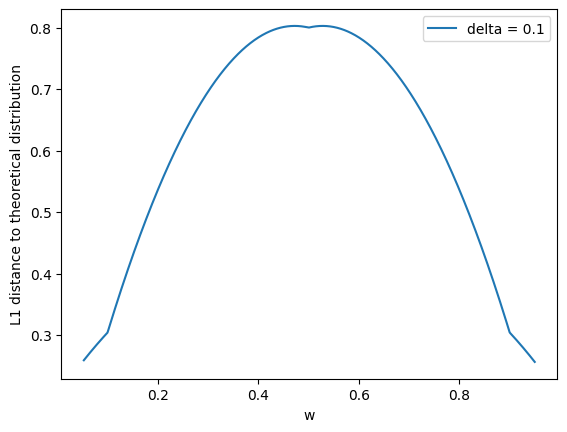

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

delta = 0.1
entdelta = entropy([delta,1-delta], base=2)

max_fac = 0.95*(1/delta)
min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
step_size = 0.01

fac_data=np.arange(min_fac,max_fac,step_size)
y_data=np.arange(min_fac,max_fac,step_size)

w_vals=[]
l1_dist=[]

i=0
for fac in fac_data:
  w = delta*fac_data[i]
  w_vals.append(w)
  # Assuming a Markov chain
  p_C = [0.5, 0.5]  # Bernoulli(1/2)
  p_X_given_C = [1 - w, w]  # BSC(w)
  p_Xp_given_X = [1 - delta, delta]  # BSC(delta)
  p_Cp_given_Xp = [1 - w, w]  # BSC(w)

  # Joint distribution of C and X
  p_CX = np.outer(p_C, p_X_given_C)
  p_XpCp = np.outer(p_Xp_given_X, p_Cp_given_Xp)
  p_CXCpXp = np.outer(p_CX, p_XpCp)

  #print(p_CXCpXp)

  p_CpXp = np.outer(p_Xp_given_X, p_Cp_given_Xp)
  p_XCpXp = np.outer(p_X_given_C, p_CpXp)

  print(p_XCpXp.flatten())
  T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]   ## See comment on next row
  rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)   ## The weight-constrained GV rate is given by this formula -- see the first baseline calculation
  entw = entropy([w,1-w], base=2)
  x = cp.Variable(8,pos=True)
  obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))       ## As above, the worst-case joint distribution corresopnds to the maximizing H(X,C',X') satisfying constraints (below)
  constraints=[]
  constraints += [cp.sum(x) == 1]
  constraints += [x[1]+x[2]+x[5]+x[6] == w]             ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) = w, i.e., d_{H}(c',x') = nw, since x' is a satellite codeword of c'
  constraints += [x[4]+x[5]+x[6]+x[7] == w]             ## This denotes the constraint p_{XC'X'}(1,0,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) + p_{XC'X'}(1,1,1) = w, i.e., wt_{H}(x) = nw, since x is a satellite codeword of \underline{0}
  constraints += [x[1]+x[3]+x[4]+x[6] <= delta]         ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,1) + p_{XC'X'}(1,0,0) + p_{XC'X'}(1,1,0) \leq \delta, i.e., d_{H}(x,x') \leq n\delta, since x' in the Hamming ball of radius n\delta around x for "bad" types
  prob = cp.Problem(obj, constraints)
  prob.solve()
  y_data[i] = min(2*entw+entdelta-prob.value,rgv)
  # Distributions
  dist_th = p_XCpXp.flatten()
  dist_opt = x.value

  # Calculate the L1 distance
  l1_dist.append(np.linalg.norm(dist_th - dist_opt, ord=1))
  print(f"For w = {w}, the L1 distance is: {np.linalg.norm(dist_th - dist_opt, ord=1)}")

  i = i+1

#fac_datap = fac_data[1:len(fac_data)]
#y_datap = y_data[1:len(y_data)]
#pos = np.argmax(y_datap)
#w_max = w_vals[pos]
#print("Max R = ", max(y_datap)," for delta = ", delta, " and w_max/delta = ", w_max)

fig = plt.figure()
plt.plot(w_vals,l1_dist, color='tab:blue',label=f'delta = {delta}')
plt.legend()
plt.xlabel("w")
plt.ylabel("L1 distance to theoretical distribution")
plt.show()

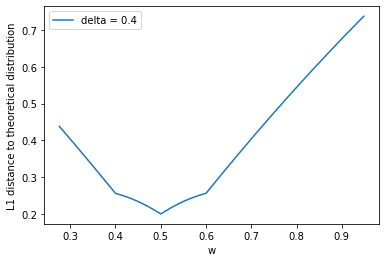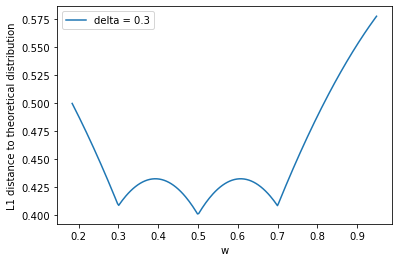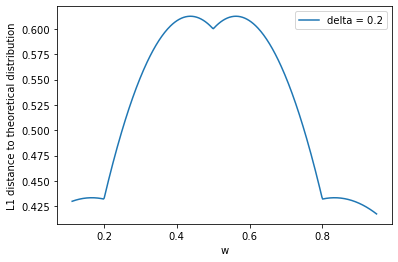

To do: interesting dependance on 𝛿 - need to do 𝛿 wrapper around code. However, for a large range of delta at least, it is apparent that the optimiser is still too far from the theoretical distribution to be correct.